In [ ]:
Create a DBA user 
======================================

mysql> create user bob identified by 'P@ssw0rd';
Query OK, 0 rows affected (0.13 sec)

mysql> grant all on *.* to bob with grant option;
Query OK, 0 rows affected (0.01 sec)

mysql> select user , host , plugin , account_locked , password_expired from mysql.user where user = 'bob';
+------+------+-----------------------+----------------+------------------+
| user | host | plugin                | account_locked | password_expired |
+------+------+-----------------------+----------------+------------------+
| bob  | %    | caching_sha2_password | N              | N                |
+------+------+-----------------------+----------------+------------------+
1 row in set (0.00 sec)


mysql> show grants for bob;
+------------------------------------------------------------------------------------+
| Grants for bob@%                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                |
+-------------------------------------------------------------------------------------
GRANT SELECT, INSERT, UPDATE, DELETE, CREATE, DROP, RELOAD, SHUTDOWN, PROCESS, FILE, REFERENCES, INDEX, ALTER, 
SHOW DATABASES, SUPER, CREATE TEMPORARY TABLES, LOCK TABLES, EXECUTE, REPLICATION SLAVE, REPLICATION CLIENT, 
CREATE VIEW, SHOW VIEW, CREATE ROUTINE, ALTER ROUTINE, CREATE USER, EVENT, TRIGGER, CREATE TABLESPACE, CREATE ROLE,
 DROP ROLE ON *.* TO `bob`@`%` WITH GRANT OPTION                                                                                                                                                                                                                                                                                                                                                                 |
| GRANT APPLICATION_PASSWORD_ADMIN,AUDIT_ABORT_EXEMPT,AUDIT_ADMIN,AUTHENTICATION_POLICY_ADMIN,BACKUP_ADMIN,
BINLOG_ADMIN,BINLOG_ENCRYPTION_ADMIN,CLONE_ADMIN,CONNECTION_ADMIN,ENCRYPTION_KEY_ADMIN,FIREWALL_EXEMPT,
FLUSH_OPTIMIZER_COSTS,FLUSH_STATUS,FLUSH_TABLES,FLUSH_USER_RESOURCES,GROUP_REPLICATION_ADMIN,GROUP_REPLICATION_STREAM,
INNODB_REDO_LOG_ARCHIVE,INNODB_REDO_LOG_ENABLE,PASSWORDLESS_USER_ADMIN,PERSIST_RO_VARIABLES_ADMIN,REPLICATION_APPLIER,
REPLICATION_SLAVE_ADMIN,RESOURCE_GROUP_ADMIN,RESOURCE_GROUP_USER,ROLE_ADMIN,SENSITIVE_VARIABLES_OBSERVER,
SERVICE_CONNECTION_ADMIN,SESSION_VARIABLES_ADMIN,SET_USER_ID,SHOW_ROUTINE,SYSTEM_USER,SYSTEM_VARIABLES_ADMIN,
TABLE_ENCRYPTION_ADMIN,XA_RECOVER_ADMIN ON *.* TO `bob`@`%` WITH GRANT OPTION |
+--------------------------------------------------------------------------------------------
2 rows in set (0.00 sec)



Create a normal user 
===============================================

mysql> create user john identified by 'J0hn@2024' password expire;
Query OK, 0 rows affected (0.00 sec)

mysql> grant select on sakila.actor to john;
Query OK, 0 rows affected (0.00 sec)

mysql> show grants for john;
+------------------------------------------------+
| Grants for john@%                              |
+------------------------------------------------+
| GRANT USAGE ON *.* TO `john`@`%`               |
| GRANT SELECT ON `sakila`.`actor` TO `john`@`%` |
+------------------------------------------------+
2 rows in set (0.00 sec)


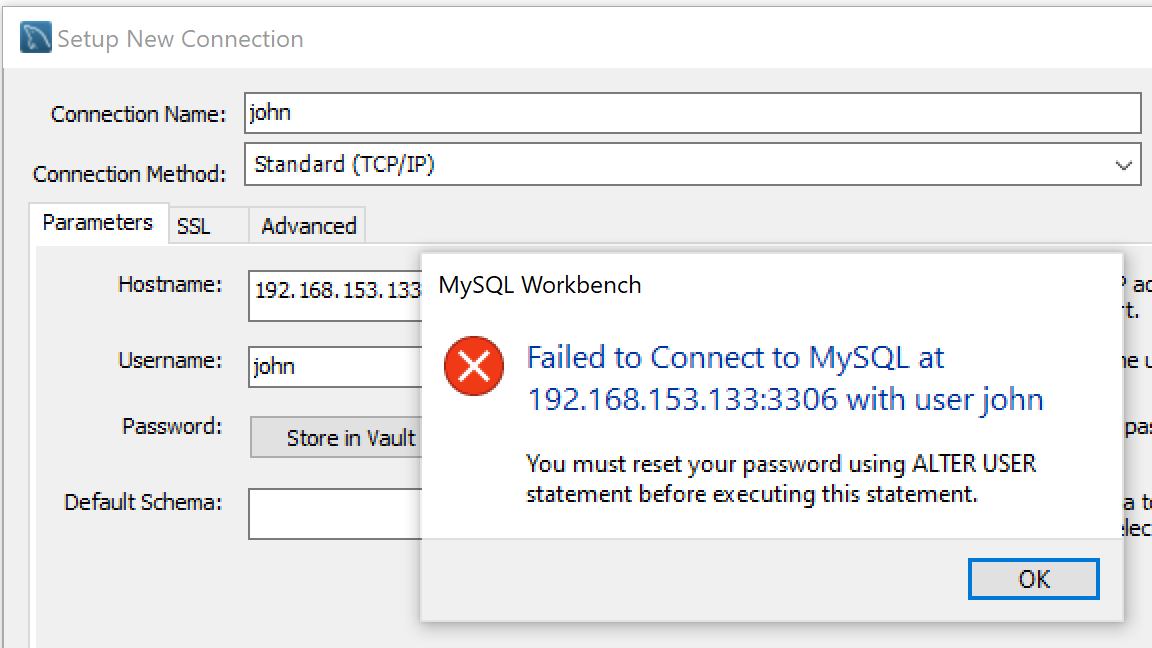

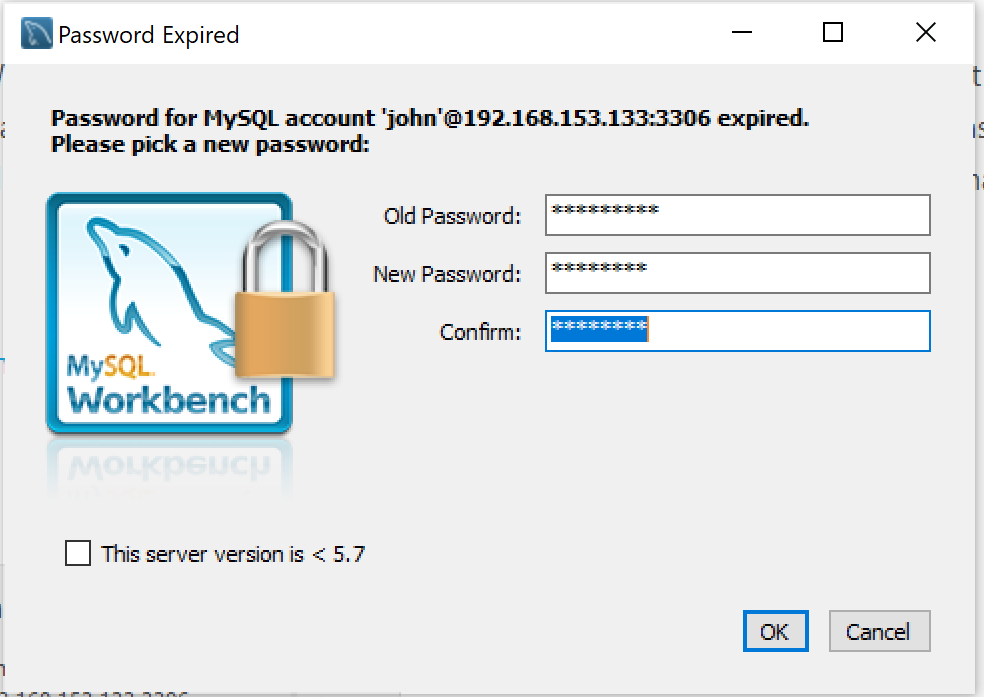

In [ ]:
select user();
'john@192.168.153.1'

show databases;
# Database
'information_schema'
'performance_schema'
'sakila'

use sakila;

show tables;
# Tables_in_sakila
'actor'

In [ ]:
MySql Authentication Plugins
=============================================

mysql_native_password - old and legacy plugin.

caching_sha2_password - new and default plugin.


mysql> select user , host , plugin from mysql.user;
+------------------+-----------+-----------------------+
| user             | host      | plugin                |
+------------------+-----------+-----------------------+
| bob              | %         | caching_sha2_password |
| db_admin         | %         | caching_sha2_password |
| john             | %         | caching_sha2_password |
| link_user        | %         | caching_sha2_password |
| mysql.infoschema | localhost | caching_sha2_password |
| mysql.session    | localhost | caching_sha2_password |
| mysql.sys        | localhost | caching_sha2_password |
| root             | localhost | caching_sha2_password |
+------------------+-----------+-----------------------+
8 rows in set (0.01 sec)


mysql> alter user john identified with 'mysql_native_password' by 'John@2024';
Query OK, 0 rows affected (0.05 sec)

mysql> select user , host , plugin from mysql.user where user = 'john';
+------+------+-----------------------+
| user | host | plugin                |
+------+------+-----------------------+
| john | %    | mysql_native_password |
+------+------+-----------------------+
1 row in set (0.01 sec)

In [ ]:
MySql Roles 
====================================

-- are named Collection of privileges.
-- no login , no password.
-- created as users in mysql.user and are locked.

mysql> create role sakila_reader , sakila_writer , sakila_admin;
Query OK, 0 rows affected (0.01 sec)

mysql> select user , host , plugin , authentication_string , account_locked from mysql.user 
where authentication_string = '';
+---------------+------+-----------------------+-----------------------+----------------+
| user          | host | plugin                | authentication_string | account_locked |
+---------------+------+-----------------------+-----------------------+----------------+
| sakila_admin  | %    | caching_sha2_password |                       | Y              |
| sakila_reader | %    | caching_sha2_password |                       | Y              |
| sakila_writer | %    | caching_sha2_password |                       | Y              |
+---------------+------+-----------------------+-----------------------+----------------+
3 rows in set (0.00 sec)

mysql> grant select on sakila.* to sakila_reader;
Query OK, 0 rows affected (0.00 sec)

mysql> grant insert,update,delete on sakila.* to sakila_writer;
Query OK, 0 rows affected (0.01 sec)

mysql> grant all on sakila.* to sakila_admin;
Query OK, 0 rows affected (0.01 sec)


mysql> create user app_reader identified by 'Apprdr@2024';
Query OK, 0 rows affected (0.01 sec)

mysql> grant sakila_reader to app_reader;
Query OK, 0 rows affected (0.00 sec)

mysql> create user app_writer identified by 'Appwrtr@2024';
Query OK, 0 rows affected (0.01 sec)

mysql> grant sakila_reader , sakila_writer to app_writer;
Query OK, 0 rows affected (0.00 sec)

mysql> create user app_admin identified by 'Appadmn@2024';
Query OK, 0 rows affected (0.01 sec)

mysql> grant sakila_admin to app_admin;
Query OK, 0 rows affected (0.00 sec)

mysql> show grants for app_reader;
+-----------------------------------------------+
| Grants for app_reader@%                       |
+-----------------------------------------------+
| GRANT USAGE ON *.* TO `app_reader`@`%`        |
| GRANT `sakila_reader`@`%` TO `app_reader`@`%` |
+-----------------------------------------------+

mysql> show grants for sakila_reader;
+---------------------------------------------------+
| Grants for sakila_reader@%                        |
+---------------------------------------------------+
| GRANT USAGE ON *.* TO `sakila_reader`@`%`         |
| GRANT SELECT ON `sakila`.* TO `sakila_reader`@`%` |
+---------------------------------------------------+